In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Import housing price dataset

In [9]:
data = pd.read_csv('dataset/housing_price_dataset.csv')
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


**Preprocess data**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
# Encoding `Neighborhood` column to numeric value
label_encoder = LabelEncoder()
data['Neighborhood'] = label_encoder.fit_transform(data['Neighborhood'])
data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


<Axes: >

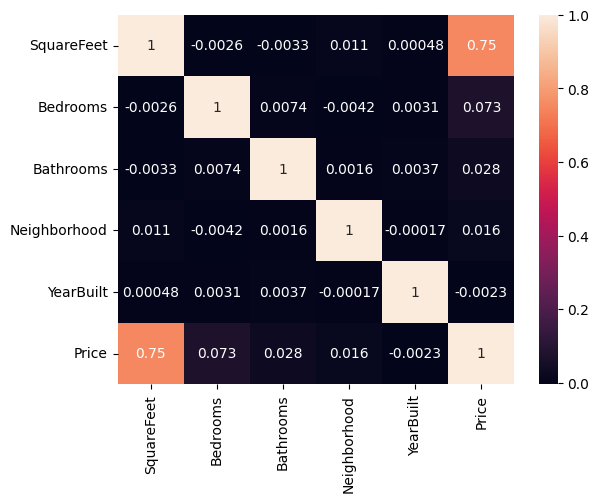

In [12]:
# Correlation matrix
sns.heatmap(data.corr(), annot=True)

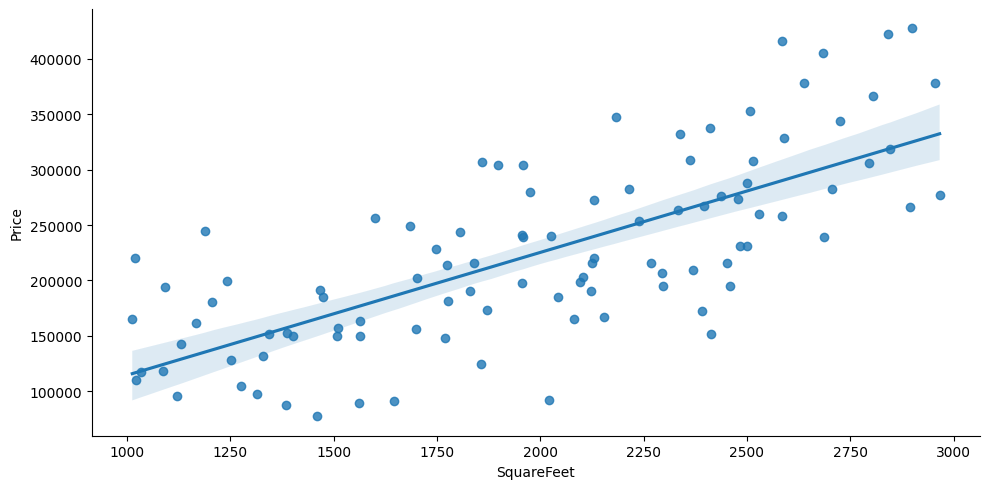

In [13]:
# Visualize SquareFeet -> Price
sns.lmplot(x='SquareFeet', y='Price', data=data[0:100], height=5, aspect=2)

In [14]:
#Seperate the feature vector and target.
y = data['Price']
X = data.drop("Price", axis=1)

In [15]:
#Split data for train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
21581,2243,3,3,2,1993
13921,2835,5,3,0,1956
35858,1172,5,3,2,2009
34294,1208,5,1,2,1953
15948,1783,4,3,0,1967


### Build model using `Deep Neural Network`

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

### Build Model

In [17]:
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear'),
])

model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

### Train Model

In [18]:
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 27741476864.0000 - mae: 133525.9688 - mse: 27741476864.0000 - val_loss: 2978983936.0000 - val_mae: 43500.0273 - val_mse: 2978983936.0000
Epoch 2/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2834252288.0000 - mae: 42471.1016 - mse: 2834252288.0000 - val_loss: 2667116032.0000 - val_mae: 41162.3047 - val_mse: 2667116032.0000
Epoch 3/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2614072576.0000 - mae: 40853.0664 - mse: 2614072576.0000 - val_loss: 2567129088.0000 - val_mae: 40409.9141 - val_mse: 2567129088.0000
Epoch 4/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2546044416.0000 - mae: 40301.6367 - mse: 2546044416.0000 - val_loss: 2549562112.0000 - val_mae: 40287.4023 - val_mse: 2549562112.0000
Epoch 5/100
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2561878016.0000 - mae: 40423.7656 - mse: 2561878016.0000 - val_loss: 2552334592.0000 - val_mae: 40316.4219 - val_mse: 2552334592.0000
Epoch 6/100


### Evaluate the model

In [22]:
test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Mean Squared Error: {test_mse}")
print(f"Test Mean Absolute Error: {test_mae}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 2545390848.0000 - mae: 40348.0273 - mse: 2545390848.0000
Test Loss: 2499378944.0
Test Mean Squared Error: 2499378944.0
Test Mean Absolute Error: 39956.19921875


### Make Predictions

In [28]:
y = y_test.iloc[0]
y_hat = model.predict(X_test.iloc[[0]])[0][0]

print(f'Ground Truth: {y}, Predict: {y_hat}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Ground Truth: 288569.82971152174, Predict: 248801.703125
